In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import scipy as sp
import sympy as sym

# № 1

In [14]:

matrix = []
file_path = 'matrix_1.txt'
with open(file_path, 'r') as f:
    numbers = f.readlines()
    for i in numbers:
        matrix.append(i.split())
#matrix = np. eye(9)
matrix = sym.Matrix(matrix)
print(matrix.eigenvals()) 


# № 2

In [48]:
def plot(x, y):
    plt.figure(figsize = (12,7))
    plt.minorticks_on()
    plt.grid(
        which='major'
    )
    plt.grid(
        which='minor',
        linestyle='--'
    )
    plt.bar(x, y)
    plt.savefig("bar.png")

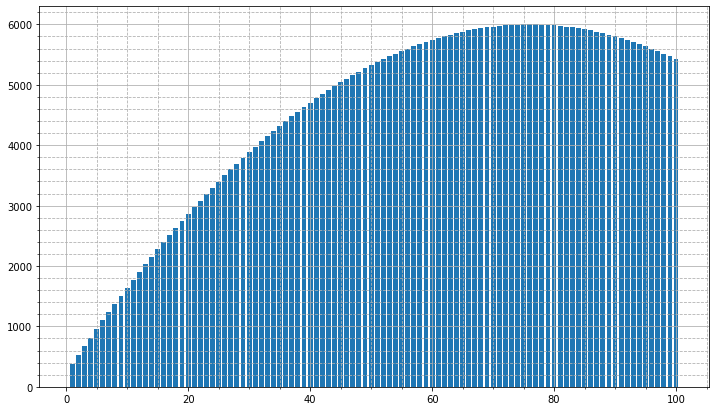

In [20]:
file_path = 'large.txt'
A = []
with open(file_path, 'r') as f:
    N = int(f.readline())
    for i in range(N):
        line = f.readline().split()
        A.append(line)
    b = f.readline().split()
A = sym.Matrix(A)
b = sym.Matrix(b)
x = A.solve(b)
plot(np.arange(1, len(x)+1), x)

# № 3

In [45]:
def plot(x, y, title):
    plt.figure(figsize = (12,7))
    plt.minorticks_on()
    plt.grid(
        which='major'
    )
    plt.grid(
        which='minor',
        linestyle='--'
    )
    plt.title(title, fontsize = 16)
    plt.scatter(x, y, linewidths = 2)
    plt.savefig(title + ".png")

In [8]:
from sympy.abc import x
from sympy import Function, Derivative

## SumPy

In [13]:
f = Function("f")
eq = sym.Eq(f(x).diff(x), -2 * f(x))
an_sol = sym.dsolve(eq, ics={f(0): np.sqrt(2)})
lmbd_sol = sym.lambdify(x, an_sol.rhs)


## SciPy

In [14]:
from scipy.integrate import solve_ivp

In [46]:
def func(x, y): return -2 * y
sol = solve_ivp(func, [0,10], [0, np.sqrt(2)])
sol_sym = ([lmbd_sol(i) for i in sol.t])



## Result graph

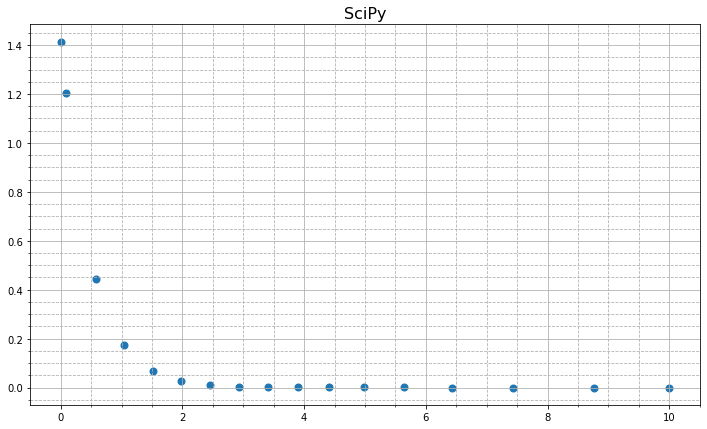

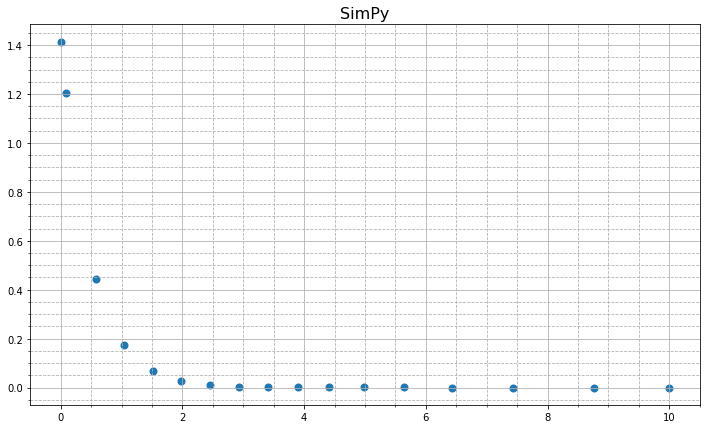

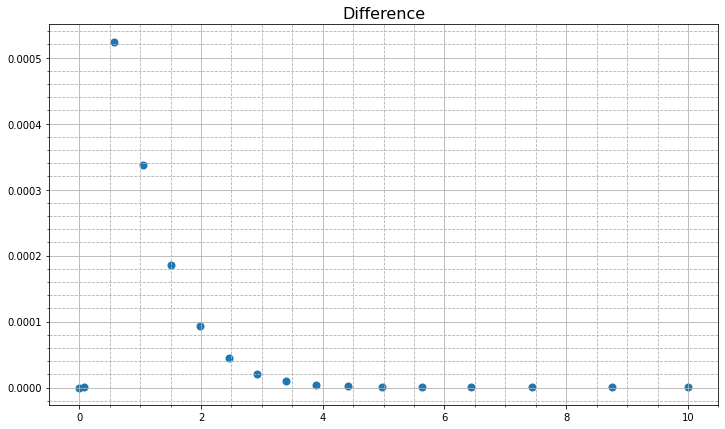

In [47]:
plot(sol.t, sol.y[1], "SciPy")
plot(sol.t, sol_sym, "SimPy")
plot(sol.t, np.abs(sol_sym-sol.y[1]), "Difference")
